## 8. Integrais múltiplas

### 8.1 Soma dupla de Riemann
([Stewart, 2022](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/438)) Considerando uma função $f$ de duas variáveis definida em um retângulo fechado
$$
R=[a, b] \times[c, d]=\left\{(x, y) \in \mathbb{R}^2 \mid a \leq x \leq b, c \leq y \leq d\right\}
$$

e supondo que $f(x, y) \geq 0$. O gráfico de $f$ é a superficie com equação $z=f(x, y)$. Seja $S$ o sólido que está acima da região $R$ e abaixo do gráfico de $f$, isto é,
$$
S=\left\{(x, y, z) \in \mathbb{R}^3 \mid 0 \leq z \leq f(x, y),(x, y) \in R\right\}
$$

então, o volume do sólido $S$ pode ser aproximado por

$$V \approx \sum_{i=1}^m \sum_{j=1}^n f\left(x_{i j}^*, y_{i j}^*\right) \Delta A$$

em que $\left(x_{i j}^*, y_{i j}^*\right)$ são *pontos de amostragem* sobre a superfíce e $f\left(x_{i j}^*, y_{i j}^*\right)\Delta A$ é o volume de uma caixa fina, ou "coluna", com base $R_{ij}$ de área $\Delta A = \Delta x \Delta y$ e altura $f\left(x_{i j}^*, y_{i j}^*\right)$.

<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_II/refs/heads/main/imagens/soma_de_riemann_dupla.png" width="1000">

<center> Figura 1: Soma dupla de Riemann (Fonte: Stewart, 2022)


A integral dupla de $f$ sobre o retângulo $R$ é definida como 
$$
\iint_R f(x, y) d A=\lim _{m, n \rightarrow \infty} \sum_{i=1}^m \sum_{j=1}^n f\left(x_{i j}^*, y_{i j}^*\right) \Delta A
$$
se esse limite existir.

A soma dupla de Riemann na qual o ponto de amostragem $\left(x_{i j}^*, y_{i j}^*\right)$ em $R_{i j}$ é tomado como o ponto
central $\left(\bar{x}_i, \bar{y}_j\right)$ de $R_{i j}$, é dada por:


$$
\iint_R f(x, y) d A \approx \sum_{i=1}^m \sum_{j=1}^n f\left(\bar{x}_i, \bar{y}_j\right) \Delta A
$$
onde $\bar{x}_i$ é o ponto médio de $\left[x_{i-1}, x_i\right]$ e $\bar{y}_j$ é o ponto médio de $\left[y_{j-1}, y_j\right]$.

**Teoria de Fubini:** Se $f$ for continua no retângulo

$$
R=\{(x, y) \mid a \leq x \leq b, c \leq y \leq d\}
$$

então,
$$
\iint_R f(x, y) d A=\int_a^b \int_c^d f(x, y) d y d x=\int_c^d \int_a^b f(x, y) dxdy
$$

<center>  <img src="imagens/integral_iterada.png" width="600">

<center> Figura 2: Integral iterada 

**Exemplo 8.1:** *(Integração dupla com SymPy)* Conside a região $R=\{(x, y) \mid 0 \leq x \leq 2, 0 \leq y \leq 2\}$ e o paraboloide elíptico $z = f(x,y)= 16-x^2-2y^2$. 

Vamos usar o SymPy para obter o valor exato do volume do sólido que está acima do quadrado $R$ e abaixo do paraboloide $z$ $\int_0^2 \int_0^2 (16-x^2-2y^2) dxdy$.

Para isso precisamos calcular a integral dupla 
$$\int_0^2 \int_0^2 (16-x^2-2y^2) dxdy .$$

In [32]:
import sympy as sp
sp.init_printing(use_unicode=True)

In [33]:
x,y = sp.symbols('x y')
sp.integrate(16-x**2-2*y**2, (x, 0, 2), (y, 0, 2))

O volume é $48$ u.v. (unidades de volume).

**Exemplo 8.2:** *(Integração dupla por soma de Riemann)* Vamos agora plotar o gráfico da função, estimar o volume do sólido usando somas de Riemann e comparar o resultado numérico com o valor exato.


*Solução:* Vamos começar plotando o gráfico da função $z=f(x,y)$.

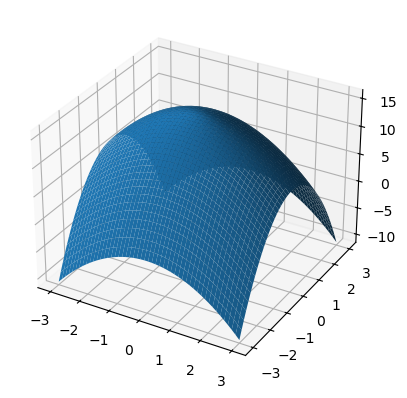

In [34]:
import numpy as np
import matplotlib.pyplot as plt

xi, yi = np.meshgrid(np.linspace(-3,3),np.linspace(-3,3))
zi = 16- xi**2 - 2*yi**2

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xi, yi, zi)
plt.show()

Dividindo a região $R=\{(x, y) \mid 0 \leq x \leq 2, 0 \leq y \leq 2\}$ em $4 \times 4$ quadrados de lados $dx=dy=0,5$ e fazendo a soma dos volumes das "caixas" com base  $R_{ij}$, $i,j=1,2,3,4$ de áreas $\Delta A = \Delta x \Delta y = 0,5^2=0,25$ e altura $f\left(x_{ij}^*, y_{ij}^*\right)$ em que $(x_{ij}^*, y_{ij})$ são os pontos do canto superior direito de cada quadrado $R_{ij}$, obtemos uma aproximação.    

In [35]:
dx=0.5; dy=0.5

# coordenadas dos pontos (x,y)
xi, yi = np.meshgrid(np.arange(dx,2+dx,dx), np.arange(dy,2+dy,dy))

# cálculo das alturas z = f(x,y)
f = lambda x,y: 16- x**2 - 2*y**2

# soma dupla de Riemann
V = np.sum(f(xi,yi))*dx*dy

In [36]:
print ('Coordenadas xij:')
print (xi)
print ('Coordenadas yij:')
print (yi)

Coordenadas xij:
[[0.5 1.  1.5 2. ]
 [0.5 1.  1.5 2. ]
 [0.5 1.  1.5 2. ]
 [0.5 1.  1.5 2. ]]
Coordenadas yij:
[[0.5 0.5 0.5 0.5]
 [1.  1.  1.  1. ]
 [1.5 1.5 1.5 1.5]
 [2.  2.  2.  2. ]]


In [37]:
print ('Soma dupla de Riemann: V =', V)

Soma dupla de Riemann: V = 41.5


Portanto a aproximação por soma de Riemann com 4 subintervalos na direção de $x$ e 4 subintervalos na direção de $y$ resultou em um volume aproximado de $41.5$, ou seja, um resultado com um erro relativo $\epsilon = 0.135417$, ou seja, na ordem de $13.5\%$.


Para obter a aproximação pela regra do ponto médio, podemos fazer:

In [38]:
V = np.sum(f(xi-dx/2,yi-dy/2))*dx*dy
print ('Pela regra do ponto médio: V=', V)

Pela regra do ponto médio: V= 48.25


A regra do ponto médio, nesse caso, forneceu um resulada com erro relativo na ordem de $0.5\%$.

A seguir é mostrada ima figura representando a superfície e a aproximação da integral por soma de Riemann.

<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_II/refs/heads/main/imagens/riemann.png">

Quanto maior é o número de divisões da regiâo $R$ melhor será a aproximação, como podemos ver na imagem abaixo:

<center><img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_II/refs/heads/main/imagens/aproximacoes_volumes.png" width="800">

<center> Figura 2: Aproximação do volume com diferentes discretizações da região R (Ver ANEXO II)

### 8.2 Regra dos trapézios

 ([Arenales e Darezo, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522112821/pageid/257)) Sabemos que a **regra dos trapézios** repetida (ou generalizada) para integração numérica de uma função de uma variável no intervalo $[a,b]$ é dada por 

$$\int_{x_0}^{x_n} F(x) dx \approx \frac{h}{2} \{F(x_0)+ 2[F(x_1) + F(x_2)+...+F(x_{n-1})]+F(x_n)\}$$

em que $n$ é o número de subintervalos, de amplitudes iguais a  $h=\frac{x_n-x_0}{n}$, com $x_0=a$ e $x_n=b$. 

Para integrais duplas fazemos

$$
F\left(x_i\right)=\int_c^d f\left(x_i, y\right) d y \simeq \frac{h}{2}\left[f\left(x_i, y_0\right)+2\left(f\left(x_i, y_1\right)+\ldots+f\left(x_i, y_{n-1}\right)\right)+f\left(x_i, y_n\right)\right]
$$

com $i=0, \ldots, n$.

Os $(n+1)$ valores $F\left(x_i\right)$ podem ser calculados por qualquer método de integração numérica e, com estes valores, podemos calcular o valor aproximado de

$$
I=\int_a^b \int_c^d f(x, y) d y d x
$$


**Exemplo 8.3:** ([Arenales e Darezo, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522112821/pageid/257)) Calcule o valor da integral dupla

$$
\int_{0.1}^{1.0} \int_{0.1}^{0.5} \ln (x+y) d y d x
$$

usando a regra dos trapézios generalizada para $h_x=0.3 \operatorname{com}$ os pontos $x_0=0.1$, $x_1=0.4, x_2=0.7$ e $x_3=1.0$ e $F\left(x_i\right), i=0, \ldots, 3$, com $h_y=0.1$ e $y_0=0.1, y_1=0.2, y_2=0.3, y_3=0.4, y_4=0.5$.

In [39]:
# dados do problema
x0 = 0.1; xn = 1.0
y0 = 0.1; yn = 0.5
nx = 3
ny = 4

hx = (xn-x0)/nx
hy = (yn-y0)/ny

x = np.arange(x0,xn+hx,hx)
y = np.arange(y0,yn+hy,hy)

print(x)
print(y)

[0.1 0.4 0.7 1. ]
[0.1 0.2 0.3 0.4 0.5]


In [40]:
f = lambda x,y: np.log(x+y)

In [41]:
Fx = []
for i in range(len(x)):
    Fxi = (hy/2)*(f(x[i],y[0]) + 
                  2*np.sum(f(x[i],y[1:-1])) + 
                  f(x[i],y[-1]))
    Fx.append(Fxi)
    
print(Fx)

[-0.3873542484860082, -0.14898979671278184, -0.0030461333113628686, 0.1031545701838904]


In [42]:
It = (hx/2)*((Fx[0] + 2*np.sum(Fx[1:-1]) + Fx[-1]))
print ("I =",It)

I = -0.08824073075256109


**Exemplo 8.4:** *(Integração dupla pela regra dos trapézios)* Vamos agora usar a regra dos trapézios para calcular a integral dupla 
$$\int_0^2 \int_0^2 (16-x^2-2y^2) dxdy .$$

Vamos criar uma função para a regra dos trapéxios generalizada:

In [43]:
def trapz2D(f,x0,xn,hx,y0,yn,hy):
    x = np.arange(x0,xn+hx,hx)
    y = np.arange(y0,yn+hy,hy)

    Fx = []
    for i in range(len(x)):
        Fxi = (hy/2)*(f(x[i],y[0]) + 
                      2*np.sum(f(x[i],y[1:-1])) + 
                      f(x[i],y[-1]))
        Fx.append(Fxi)
    Fx = np.array(Fx)
    It = (hx/2)*((Fx[0] + 2*np.sum(Fx[1:-1]) + Fx[-1]))
    return It

In [44]:
# com hx = hy = 0.5
trapz2D(lambda x,y: 16-x**2-2*y**2,0,2,0.5,0,2,0.5)

In [45]:
# com hx = hy = 0.2
trapz2D(lambda x,y: 16-x**2-2*y**2,0,2,0.2,0,2,0.2)

### 8.3 Regra de Simpson generalizada

([Arenales e Darezo](https://integrada.minhabiblioteca.com.br/reader/books/9788522112821/pageid/256)) Sabemos que a **regra 1/3 de Simpson** repetida (ou generalizada) para integração numérica de uma função de uma variável no intervalo $[a,b]$ é dada por 

$$
\begin{array}{r}
I=\int_a^b F(x) d x \simeq \frac{h}{3}\left[F\left(x_0\right)+4\left(F\left(x_1\right)+F\left(x_3\right)+\cdots+F\left(x_{n-1}\right)\right)+\right. \\
\left.+2\left(F\left(x_2\right)+F\left(x_4\right)+\cdots+F\left(x_{n-2}\right)\right)+F\left(x_n\right)\right]
\end{array}
$$

em que

$$
h=\frac{\left(x_n-x_0\right)}{n},(n \text { par })
$$

e

$$
F\left(x_i\right) \simeq \int_c^d f\left(x_i, y\right) d y, \quad i=0, \ldots, n
$$


**Exemplo 8.5:** ([Arenales e Darezo, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522112821/pageid/259)) Calcule o valor da integral dupla

$$
\int_0^2 \int_0^1 \cos (x+y) d y d x
$$

usando a regra $1 / 3$ de Simpson generalizada para $h_x=0.5$ com $x_0=0$, $x_1=0.5$, $x_2=1.0$, $x_3=1.5$, $x_4=2.0$ e $h_y=0.25$ e os pontos $y_0=0$, $y_1=0.25$, $y_2=0.5$, $y_3=0.75$, $y_4=1.0$, conforme segue:

In [46]:
# dados do problema
x0 = 0; xn = 2
y0 = 0; yn = 1
nx = 4
ny = 4

hx = (xn-x0)/nx
hy = (yn-y0)/ny

x = np.arange(x0,xn+hx,hx)
y = np.arange(y0,yn+hy,hy)

print(x)
print(y)

[0.  0.5 1.  1.5 2. ]
[0.   0.25 0.5  0.75 1.  ]


In [47]:
f = lambda x,y: np.cos(x+y)

In [48]:
Fx = []
for i in range(len(x)):
    Fxi = (hy/3)*(f(x[i],y[0]) + 
                  4*np.sum(f(x[i],y[1:ny:2])) + 
                  2*np.sum(f(x[i],y[2:ny:2])) + 
                  f(x[i],y[-1]))
    Fx.append(Fxi)
print(np.round(Fx,4))

[ 0.8415  0.5181  0.0678 -0.399  -0.7682]


In [49]:
It = (hx/3)*(Fx[0] + 
             4*np.sum(Fx[1:nx:2]) + 
             2*np.sum(Fx[2:nx:2]) + 
             Fx[-1])

print ("I =",np.round(It,4))

I = 0.1142


**Exemplo 8.6:** *(Integração dupla pela regra 1/3 de Simpson)* Vamos agora usar a regra 1/3 de Simpson para calcular a integral dupla 
$$\int_0^2 \int_0^2 (16-x^2-2y^2) dxdy .$$

Vamos primeiramente criar uma função para o cálculo da integral pela regra 1/3 de Simpson:

In [50]:
def simps13(f,x0,xn,hx,y0,yn,hy):
    x = np.arange(x0,xn+hx,hx)
    y = np.arange(y0,yn+hy,hy)

    Fx = []
    for i in range(len(x)):
        Fxi = (hy/3)*(f(x[i],y[0]) + 
                      4*np.sum(f(x[i],y[1:ny:2])) + 
                      2*np.sum(f(x[i],y[2:ny:2])) + 
                      f(x[i],y[-1]))
        Fx.append(Fxi)
        
    It = (hx/3)*(Fx[0] + 
                 4*np.sum(Fx[1:nx:2]) + 
                 2*np.sum(Fx[2:nx:2]) + 
                 Fx[-1]) 
    return It

Então usamos a função para calcular a integral com $h_x=h_y=0.5$:

In [51]:
simps13(lambda x,y: 16-x**2-2*y**2,0,2,0.5,0,2,0.5)

### 8.4 Integração numérica com SciPy

**Regra dos trapézios**: Integra ao longo do eixo dado usando a regra trapezoidal composta ([referência](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html#scipy.integrate.trapezoid)).

**Exemplo 8.7:** *(Integração dupla pela regra dos trapézios do SciPy)* Vamos repetir o Exemplo 8.4 mas agor utilizando a regra dos trapézios disponível em SciPy para calcular a integral dupla 
$$\int_0^2 \int_0^2 (16-x^2-2y^2) dxdy .$$

In [52]:
from scipy.integrate import trapezoid

In [53]:
# com hx = hy = 0.5
x,y = np.meshgrid(np.arange(0,2.5,0.5), np.arange(0,2.5,0.5))
z = 16-x**2-2*y**2

F = trapezoid(z,dx=0.5,axis=0)
I = trapezoid(F,dx=0.5,axis=0)
print('F =', F)
print('I =', I)

F = [26.5 26.  24.5 22.  18.5]
I = 47.5


In [54]:
# com hx = hy = 0.2
x,y = np.meshgrid(np.arange(0,2.2,0.2), np.arange(0,2.2,0.2))
z = 16-x**2-2*y**2

F = trapezoid(z,dx=0.2,axis=0)
I = trapezoid(F,dx=0.2,axis=0)
print('F =', F)
print('I =', I)

F = [26.64 26.56 26.32 25.92 25.36 24.64 23.76 22.72 21.52 20.16 18.64]
I = 47.92


**Exemplo 8.8:** *(Integração dupla pela regra de Simpson do SciPy)* Vamos repetir o Exemplo 8.4 mas agor utilizando a regra dos trapézios disponível em SciPy para calcular a integral dupla 
$$\int_0^2 \int_0^2 (16-x^2-2y^2) dxdy .$$

In [55]:
from scipy.integrate import simpson

In [56]:
# com hx = hy = 0.5
x,y = np.meshgrid(np.arange(0,2.5,0.5), 
                  np.arange(0,2.5,0.5))
z = 16-x**2-2*y**2

F = simpson(z,dx=0.5,axis=0)
I = simpson(F,dx=0.5,axis=0)
print('F =', F)
print('I =', I)

F = [26.66666667 26.16666667 24.66666667 22.16666667 18.66666667]
I = 47.999999999999986


### 8.5 Integrais duplas em regiões não retangulares**

I) Se $f$ é continua em uma região $D$ tal que
$$
D=\left\{(x, y) \mid a \leq x \leq b, g_1(x) \leq y \leq g_2(x)\right\}
$$
então, 
$$\quad \iint_D f(x, y) d A=\int_a^b \int_{g_1(x))}^{g_2(x)} f(x, y) dy dx$$

II) Se $f$ é continua em uma região $D$ descrita por
$$
D=\left\{(x, y) \mid c \leq y \leq d, h_1(y) \leq x \leq h_2(y)\right\}
$$
então,
$$
\iint_D f(x, y) d A=\int_c^d \int_{h_1(y)}^{h_2(y)} f(x, y) d x d y
$$

**Exemplo 8.9:** Calcule $\iint_D(x+2 y) d A$, onde $D$ é a região limitada pelas parábolas $y=2 x^2$ e $y=1+x^2$.

*Solução:* Primeiramente vamos fazer o gráfico da região $D$

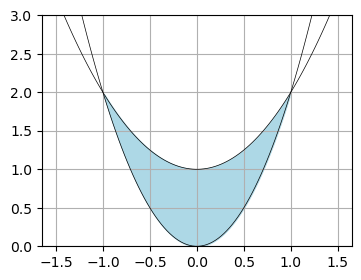

In [57]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot()

x = np.linspace(-1.5,1.5,100)
y1 = 2*x**2
y2 = 1+x**2
plt.plot(x,y1, color='k', lw=0.5)
plt.plot(x,y2, color='k', lw=0.5)
plt.fill_between(x, y1, y2, where=y2>y1, color='lightblue')
ax.set_ylim(0,3)
plt.grid()

Podemos observar que os limites em $x$ são -1 e 1, o que pode ser confirmado encontrando os pontos comuns das duas parábolas. Podemos fazer isso usando SymPy como é mostrado a seguir:

In [58]:
import sympy as sp
sp.init_printing(use_unicode=True)
x,y = sp.symbols('x y')

sp.solve([sp.Eq(y,2*x**2), 
          sp.Eq(y,1+x**2)])

Queremos então resolver a integral iterada $\int_{-1}^1 \int_{2 x^2}^{1+x^2}(x+2 y) dy dx$. Podemos fazer isso utilizando o SymPy como é mostrado a seguir 

In [59]:
integral_em_y = sp.integrate(x+2*y, (y, 2*x**2,1+x**2))
display(integral_em_y)

In [60]:
integral_em_x = sp.integrate(integral_em_y, (x, -1,1))
display(integral_em_x)

**Exemplo 8.10:** Determine o volume do sólido que está abaixo do paraboloide $z = x^2$ e acima da região $D$ do plano $xy$ limitada pela reta $y = 2x$ e pela parábola $y = x^2$

In [61]:
import sympy as sp
sp.init_printing(use_unicode=True)

x,y = sp.symbols('x y')

sp.solve([sp.Eq(y,2*x), 
          sp.Eq(y,x**2)])

Observando o gráfico da reta e da parábola e os pontos de interseção, concluimos que a integral a ser resolvida é 

$$
V=\iint_D\left(x^2+y^2\right) d A=\int_0^2 \int_{x^2}^{2 x}\left(x^2+y^2\right) d y d x
$$

A seguir é mostrado o gráfico da região $D$ e uma representação do volume $V$.

<center><img src="imagens/exemplo3.png" width="600">

<center> Figura 3: Gráfico da região $D$ e uma representação do volume 

Podemos resolver a integral como é mostrado a seguir:

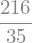

In [62]:
sp.integrate(x**2+y**2,(y,x**2,2*x),(x,0,2))

### Exercícios:
Fonte: [Stewart (2022)](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/456)

**1.**
(a) Estime o volume do sólido que está abaixo da superfície $z=x y$ e acima do retângulo
$$
R=\{(x, y) \mid 0 \leq x \leq 6,0 \leq y \leq 4\}
$$

Utilize a soma de Riemann com $m=3, n=2$ e tome como ponto de amostragem o canto superior direito de cada sub-retângulo.

(b) Use a Regra do Ponto Médio para estimar o volume do sólido da parte (a).

**2.** Se $R=[0,4] \times[-1,2]$, use a soma de Riemann com $m=2, n=3$ para estimar o valor de $\iint_R\left(1-x y^2\right) d A$. Tome os pontos de amostragem como (a) os cantos inferiores direitos e (b) como os cantos superiores esquerdos dos retângulos.

**3.** (a) Use uma soma de Riemann com $m=n=2$ para estimar o valor de $\iint_R x e^{-x y} d A$, onde $R=[0,2] \times[0,1]$. Tome os pontos de amostragem como os cantos superiores direitos.

(b) Use a Regra do Ponto Médio para dar uma estimativa da integral do item (a).

**4.** (a) Estime o volume do sólido que está abaixo da superfície $z=1+x^2+3 y$ e acima do retângulo $R=[1,2] \times[0,3]$. Use a soma de Riemann com $m=n=2$ e escolha os pontos de amostragem como os cantos inferiores esquerdos.

(b) Use a Regra do Ponto Médio para estimar o volume do item (a).


**5.** Calcule as integrais a seguir. Faça os gráfico da superfície e da região de integração.

(a) $\iint_D y d A, D \text { é limitada por } y=x-2, x=y^2$

(b) $\iint_D y^2 e^{x y} d A, D \text { é limitada por } y=x, y=4, x=0$ 

(c) $\iint_D \operatorname{sen}^2 x d A, D \text { é limitada por } y=\cos x, 0 \leq x \leq \pi / 2, y=0, x=0$

(d) $\iint_D 6 x^2 d A, D \text { é limitada por } y=x^3, y=2 x+4, x=0$

(e) $\iint_D x \cos y d A, D \text { é limitada por } y=0, y=x^2, x=1$

(f) $\iint_D\left(x^2+2 y\right) d A, D \text { é limitada por } y=x, y=x^3, x \geq 0$

(g) $\iint_D y^2 d A, D \text { é a região triangular com vértices }(0,1),(1,2),(4,1)$

(h) $\iint_D x y d A, D \text { é limitada pelo quarto de círculo, } y=\sqrt{1-x^2} x \geq 0 \text { e pelos eixos. }$

(i) $\iint_D(2 x-y) d A, D \text { é limitada pelo círculo de centro na origem e }  \text { raio } 2$ 

(j) $\iint_D y d A, D \text { é a região triangular com vértices }(0,0),(1,1) \mathrm{e}(4,0)$

**6.** Determine o volume do sólido:

(a) Abaixo do plano $3 x+2 y-z=0$ e acima da região limitada pelas parábolas $y=x^2$ e $x=y^2$

(b) Abaixo da superficie $z=1+x^2 y^2$ e acima da região limitada por $x=y^2$ e $x=4$

(c) Abaixo da superfície $z=x y$ e acima do triângulo e vértices $(1,1),(4,1)$ e $(1,2)$

(d) Limitado pelo paraboloide $z=x^2+y^2+1$ e pelos planos $x=0$, $y=0, z=0$ e $x+y=2$

(e) O tetraedro limitado pelos planos coordenados e pelo plano $2 x+y+z=4$

(f) Limitado pelos planos $z=x, y=x, x+y=2$ e $z=0$

(g) Limitado pelos cilindros $z=x^2, y=x^2$ e pelos planos $z=0, y=4$

(h) Limitado pelo cilindro $y^2+z^2=4$ e pelos planos $x=2 y, x=0$, $z=0$ no primeiro octante

(i) Limitado pelo cilindro $x^2+y^2=1$ e pelos planos $y=z, x=0$, $z=0$ no primeiro octante